In [51]:
import re
import requests
import json
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
url="https://sicodid2024.iecm.mx/sicodid2024/assets/mapas-a4703968.js"

In [53]:
response = requests.get(url)
data= response.text

In [54]:
#Obtener número de featurecollections
pattern = r'FeatureCollection'
matches = re.findall(pattern, data)
#Obtener data del segundo featurecollection

features= data.split("FeatureCollection")


In [55]:
objetivo=features[2]
print(objetivo[:1000])

",V="DISTRITO_LOCAL",$=[{type:"Feature",properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:1,ID:1},geometry:{type:"Polygon",coordinates:[[[-99.1250676,19.5937813],[-99.12551,19.5937317],[-99.1273557,19.5908691],[-99.1286333,19.5896154],[-99.1299149,19.5893546],[-99.1302753,19.589209],[-99.1306347,19.5890613],[-99.1320727,19.588252],[-99.1332968,19.5882949],[-99.1352103,19.5872343],[-99.1352277,19.5848213],[-99.1357421,19.5839643],[-99.1360043,19.5837799],[-99.1388798,19.5827554],[-99.1398689,19.5803968],[-99.1403732,19.5791346],[-99.1400903,19.5778639],[-99.1402159,19.5770256],[-99.1417688,19.5750074],[-99.142031,19.5747677],[-99.1422932,19.574528],[-99.1431381,19.5740577],[-99.1459926,19.5714673],[-99.1464969,19.5704261],[-99.1465648,19.569724],[-99.1468059,19.5682523],[-99.1467262,19.5661524],[-99.1479572,19.5641771],[-99.1510943,19.5615253],[-99.1515413,19.5615433],[-99.152222,19.5621691],[-99.1532131,19.5621682],[-99.1540484,19.5618359],[-99.1569614,19.5598993],[-99.1576794,19.5589592],[-99.1

In [56]:
data_limpia=objetivo[24:437608]
print(data_limpia[:1000])

{type:"Feature",properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:1,ID:1},geometry:{type:"Polygon",coordinates:[[[-99.1250676,19.5937813],[-99.12551,19.5937317],[-99.1273557,19.5908691],[-99.1286333,19.5896154],[-99.1299149,19.5893546],[-99.1302753,19.589209],[-99.1306347,19.5890613],[-99.1320727,19.588252],[-99.1332968,19.5882949],[-99.1352103,19.5872343],[-99.1352277,19.5848213],[-99.1357421,19.5839643],[-99.1360043,19.5837799],[-99.1388798,19.5827554],[-99.1398689,19.5803968],[-99.1403732,19.5791346],[-99.1400903,19.5778639],[-99.1402159,19.5770256],[-99.1417688,19.5750074],[-99.142031,19.5747677],[-99.1422932,19.574528],[-99.1431381,19.5740577],[-99.1459926,19.5714673],[-99.1464969,19.5704261],[-99.1465648,19.569724],[-99.1468059,19.5682523],[-99.1467262,19.5661524],[-99.1479572,19.5641771],[-99.1510943,19.5615253],[-99.1515413,19.5615433],[-99.152222,19.5621691],[-99.1532131,19.5621682],[-99.1540484,19.5618359],[-99.1569614,19.5598993],[-99.1576794,19.5589592],[-99.158184,19.5583141],[-99.1

In [57]:
#Obtener todos lo que venga desde "properties hasta el }"
pattern = r'properties(.*?)\}'
matchprop = re.findall(pattern, objetivo)
#Incoporar el } al final a todos los elementos de la lista
matchprop= [x+"}" for x in matchprop]
#Añadir el pattern "properties" antes del primer : de cada elemento
matchprop= [re.sub(r':', 'properties'+':', x, count=1) for x in matchprop]
matchprop

['properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:1,ID:1}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:2,ID:2}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:3,ID:3}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:4,ID:4}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:5,ID:5}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:6,ID:6}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:7,ID:7}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:8,ID:8}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:9,ID:9}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:10,ID:10}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:11,ID:11}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:12,ID:12}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:13,ID:13}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:14,ID:14}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:15,ID:15}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:16,ID:16}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:17,ID:17}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:18,ID:18}',
 'properties:{ENTIDAD:9,TIPO:0,DISTRITO_L:19,I

In [58]:
formatted_prop = []
for item in matchprop:
    # Corregir el formato del JSON
    corrected = re.sub(r'(\w+):', r'"\1":', item)  # Comas entre llaves
    corrected = corrected.replace("properties:", '"properties":')  
    corrected = '{' + corrected + '}'  # Cerrar el JSON

    try:
        json_object = json.loads(corrected)
        formatted_prop.append(json_object)  #
        print("Parseado exitoso:", json_object)
    except json.JSONDecodeError as e:
        print("Fallo el parseo:", e)


for entry in formatted_prop:
    print(entry)


Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 1, 'ID': 1}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 2, 'ID': 2}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 3, 'ID': 3}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 4, 'ID': 4}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 5, 'ID': 5}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 6, 'ID': 6}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 7, 'ID': 7}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 8, 'ID': 8}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 9, 'ID': 9}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 10, 'ID': 10}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 11, 'ID': 11}}
Parseado exitoso: {'properties': {'ENTIDAD': 9, 'T

In [59]:
#Obtener todos lo que venga desde "geometry hasta el }}"
pattern = r'geometry(.*?)\}\}'
matchgeo = re.findall(pattern, objetivo)
#Incoporar el }} al final a todos los elementos de la lista
matchgeo= [x+"}}" for x in matchgeo]
matchgeo= [re.sub(r':', 'geometry'+':', x, count=1) for x in matchgeo]
#Eliminar }} al final de cada elemento
matchgeo= [re.sub(r'}}', '', x) for x in matchgeo]
print(matchgeo[:2])

['geometry:{type:"Polygon",coordinates:[[[-99.1250676,19.5937813],[-99.12551,19.5937317],[-99.1273557,19.5908691],[-99.1286333,19.5896154],[-99.1299149,19.5893546],[-99.1302753,19.589209],[-99.1306347,19.5890613],[-99.1320727,19.588252],[-99.1332968,19.5882949],[-99.1352103,19.5872343],[-99.1352277,19.5848213],[-99.1357421,19.5839643],[-99.1360043,19.5837799],[-99.1388798,19.5827554],[-99.1398689,19.5803968],[-99.1403732,19.5791346],[-99.1400903,19.5778639],[-99.1402159,19.5770256],[-99.1417688,19.5750074],[-99.142031,19.5747677],[-99.1422932,19.574528],[-99.1431381,19.5740577],[-99.1459926,19.5714673],[-99.1464969,19.5704261],[-99.1465648,19.569724],[-99.1468059,19.5682523],[-99.1467262,19.5661524],[-99.1479572,19.5641771],[-99.1510943,19.5615253],[-99.1515413,19.5615433],[-99.152222,19.5621691],[-99.1532131,19.5621682],[-99.1540484,19.5618359],[-99.1569614,19.5598993],[-99.1576794,19.5589592],[-99.158184,19.5583141],[-99.1581444,19.5575589],[-99.1579689,19.5568959],[-99.1575493,19.55

In [60]:
#Obtener coordenadas de cada elemento
geometrias=[]
for i in range(len(matchgeo)):
    geometrias.append(matchgeo[i].split("type:")[1])

In [61]:
gdf = gpd.GeoDataFrame()
#Cada elemento del diccionario se convierte en una columna
for key in formatted_prop[0].keys():
    gdf[key] = [x[key] for x in formatted_prop]
gdf

,properties
0,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 1, 'ID..."
1,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 2, 'ID..."
2,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 3, 'ID..."
3,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 4, 'ID..."
4,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 5, 'ID..."
5,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 6, 'ID..."
6,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 7, 'ID..."
7,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 8, 'ID..."
8,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 9, 'ID..."
9,"{'ENTIDAD': 9, 'TIPO': 0, 'DISTRITO_L': 10, 'I..."


In [62]:

#Convertir a un dataframe
properties_df = gdf['properties'].apply(pd.Series)

# Concatenar el dataframe de propiedades con el dataframe original
gdf = pd.concat([gdf.drop(['properties'], axis=1), properties_df], axis=1)
#Añadir geometrías de cada elemento
gdf['geometry'] = geometrias
#Añadir type al principio de cada elemento
gdf['geometry'] = gdf['geometry'].apply(lambda x: '"type":'+x)
#Añadir "" a coordinates    
gdf['geometry'] = gdf['geometry'].apply(lambda x: x.replace('coordinates', '"coordinates"'))
#Añadir {} al principio y al final de cada elemento
gdf['geometry'] = gdf['geometry'].apply(lambda x: '{'+x+'}')

gdf


,ENTIDAD,TIPO,DISTRITO_L,ID,geometry
0,9,0,1,1,"{""type"":""Polygon"",""coordinates"":[[[-99.1250676..."
1,9,0,2,2,"{""type"":""Polygon"",""coordinates"":[[[-99.1761269..."
2,9,0,3,3,"{""type"":""Polygon"",""coordinates"":[[[-99.2048633..."
3,9,0,4,4,"{""type"":""Polygon"",""coordinates"":[[[-99.0974114..."
4,9,0,5,5,"{""type"":""Polygon"",""coordinates"":[[[-99.218133,..."
5,9,0,6,6,"{""type"":""Polygon"",""coordinates"":[[[-99.0669914..."
6,9,0,7,7,"{""type"":""Polygon"",""coordinates"":[[[-99.0263142..."
7,9,0,8,8,"{""type"":""Polygon"",""coordinates"":[[[-98.9795996..."
8,9,0,9,9,"{""type"":""Polygon"",""coordinates"":[[[-99.1418258..."
9,9,0,10,10,"{""type"":""Polygon"",""coordinates"":[[[-99.1221413..."


In [63]:
import geopandas as gpd
from shapely.geometry import shape
import json

def convert_to_geometry(geo_json_str):
    try:
        # Convertir el JSON a un diccionario
        geo_dict = json.loads(geo_json_str)
        # Convertir el diccionario a un objeto de geometría
        return shape(geo_dict)
    except Exception as e:
        print(f"Error convirtiendo a geometría: {e}")
        return None

# Aplicar la función a la columna de geometría
gdf['geometry'] = gdf['geometry'].apply(convert_to_geometry)
#Convertir a una geodataframe
gdf = gpd.GeoDataFrame(gdf, geometry='geometry', crs="EPSG:4326")


(-99.39566403, -98.92421877, 19.02230641, 19.62099439)

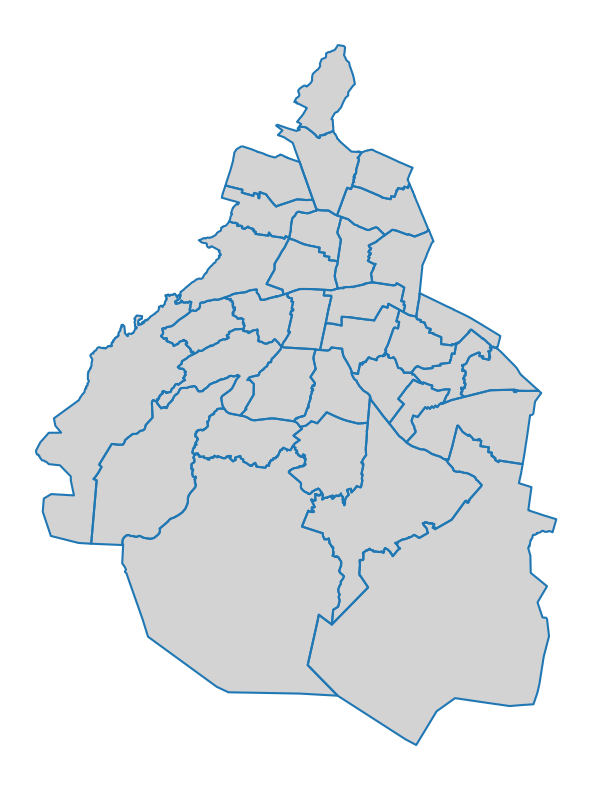

In [64]:
#Mapear los distritos
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='lightgrey')
#Eliminar los ejes
ax.axis('off')